Libraries

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd
import plotly.express as px

Styles

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (20,10)

In [5]:
saved_style_state = matplotlib.rcParams.copy()

In [6]:
pd.set_option('display.max_rows', None)

Reading files...

In [7]:
ev = pd.read_csv("IEA-EV-data.csv")

In [8]:
country = pd.read_csv("countries.csv")

In [9]:
energy = pd.read_csv("energy.csv")

Cleaning file

In [10]:
world_geo = pd.read_csv("world_geo.csv")

world_geo = world_geo.rename({'gdp_md_est': 'sales'}, axis=1)

world_geo = world_geo[(world_geo.name != 'Antarctica')]

world_geo = world_geo.drop('Unnamed: 0', axis=1)

world_geo = world_geo.replace(0, np.nan)

world_geo = world_geo.sort_values(['name'])

items_geo = []

for c in world_geo.name:
    items_geo.append(c)

items_geo.pop()

items_geo.pop()

l = len(items_geo)

Choropleth map (total electric vehicle sales)

In [11]:
fig = px.choropleth(world_geo,
    locations = 'iso_a3',
    color = 'sales',
    title = 'Total Electric Vehicle Sales per Country',
    range_color = [0, 1000000],
    color_continuous_scale = 'Plasma',
    
)


fig.show()

Latest sales share

In [12]:
def sales_share_latest(country):
    s = ev[(ev.region == country) & (ev.parameter == 'EV sales share') & (ev.category == 'Historical') & (ev['mode'] == 'Cars')]

    last = s.iloc[-1].value

    return last

Earliest sales share

In [13]:
def sales_share_earliest(country):
    s = ev[(ev.region == country) & (ev.parameter == 'EV sales share') & (ev.category == 'Historical') & (ev['mode'] == 'Cars')]

    first = s.iloc[-2].value

    return first

List of all recorded countries

In [14]:
country_list = []

for c in ev.region:
    if c not in country_list:
        country_list.append(c)

country_list.remove('World')
country_list.remove('Europe')
country_list.remove('Rest of the world')
country_list.remove('Other Europe')
country_list.remove('Indonesia')
country_list.remove('Thailand')

country_list[15] = 'South Korea'

country_list = sorted(country_list)

country_list[-1] = country_list[-2]
country_list[-2] = 'United Kingdom'


Sales Share Lists

In [15]:
shares_latest = []
for c in country_list:
    if c == 'South Korea':
        shares_latest.append(f"{sales_share_latest('Korea')}")
    else:
        shares_latest.append(f"{sales_share_latest(c)}")

shares_earliest = []
for c in country_list:
    if c == 'South Korea':
        shares_earliest.append(f"{sales_share_earliest('Korea')}")
    else:
        shares_earliest.append(f"{sales_share_earliest(c)}")


shares_latest = list(map(float, shares_latest))
shares_earliest = list(map(float, shares_earliest))


l = len(shares_latest)
l2 = len(shares_earliest)


New Dataframe

In [16]:
df = pd.DataFrame({'2021': shares_latest})
df1 = pd.DataFrame({'2020': shares_earliest})
df2 = pd.DataFrame({'country': country_list})

all_shares = pd.concat([df2, df1, df], axis=1)

all_shares = all_shares.sort_values('2021')


Bar plot

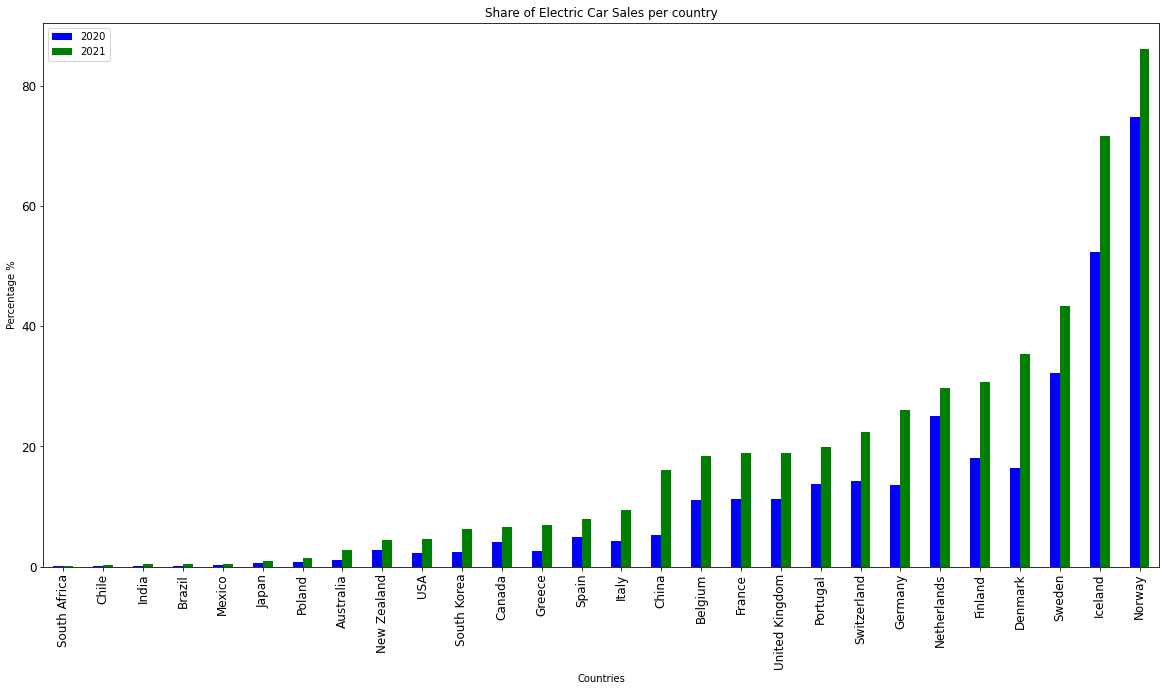

In [17]:

all_shares.plot(kind = 'bar', 
x = 'country', 
stacked = False,
title = 'Share of Electric Car Sales per country',
xlabel = 'Countries',
ylabel = 'Percentage %',
fontsize = '12',
color = {'2020': 'blue','2021': 'green'}
)

plt.show()

Changing values in dataset

In [18]:
world_share = world_geo

world_share = world_share.sort_values('name')

world_share = world_share.rename(columns = {'sales': 'percentage'})

In [19]:
total_sales = []

for i in world_share.percentage:
    if i > 0:
        total_sales.append(i)

In [20]:
world_share['percentage'].replace(to_replace = total_sales, value = shares_latest, inplace = True)


Choropleth for ev sales share

In [21]:
fig2 = px.choropleth(world_share,
    locations = 'iso_a3',
    color = 'percentage',
    title = 'Electric Vehicle Sales Share per Country',
    range_color = [0,90],
    color_continuous_scale = 'Plasma',
    
)


fig2.show()

Investigating energy data

In [22]:
a = energy.iloc[262] 

df = pd.DataFrame(a)


In [23]:
countries = items_geo

filter = energy['Country Name'].isin(countries)

filter_energy = energy[filter]

new_countries = []

for c in filter_energy['Country Name']:
    new_countries.append(c)


results = []

count = 0

for i in filter_energy['2019']:
    results.append(f"{i}")
    count += 1


In [24]:
new_countries.sort()

new_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Denmark',
 'Djibouti',
 'Ecuador',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mexico',
 'Moldova

In [25]:
world_re = world_geo

world_re

,pop_est,continent,name,iso_a3,sales,geometry
103,34124811,Asia,Afghanistan,AFG,NaN,"POLYGON ((66.51860680528867 37.36278432875879,..."
125,3047987,Europe,Albania,ALB,NaN,"POLYGON ((21.0200403174764 40.84272695572588, ..."
82,40969443,Africa,Algeria,DZA,NaN,POLYGON ((-8.684399786809053 27.39574412689601...
74,29310273,Africa,Angola,AGO,NaN,MULTIPOLYGON (((12.99551720546518 -4.781103203...
9,44293293,South America,Argentina,ARG,NaN,MULTIPOLYGON (((-68.63401022758323 -52.6363704...
109,3045191,Asia,Armenia,ARM,NaN,"POLYGON ((46.50571984231797 38.77060537368629,..."
137,23232413,Oceania,Australia,AUS,47744.0,MULTIPOLYGON (((147.6892594748842 -40.80825815...
114,8754413,Europe,Austria,AUT,NaN,"POLYGON ((16.97966678230404 48.12349701597631,..."
145,9961396,Asia,Azerbaijan,AZE,NaN,MULTIPOLYGON (((46.40495079934882 41.860675157...
19,329988,North America,Bahamas,BHS,NaN,"MULTIPOLYGON (((-78.98 26.79, -78.510000000000..."


In [28]:
count = -1
index = 0

for c in world_re.name:
    count += 1
    if c == new_countries[index]:
        world_re['sales'].iloc[count] =  results[index]
        index += 1

world_reset = world_re.reset_index()

/var/folders/kr/tpqxlsqd5012gdrwgp9860v40000gn/T/ipykernel_14193/1026286007.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IndexError: list index out of range

In [ ]:
world_sorted = world_reset.drop('index', axis=1)

world_sorted['sales'].iloc[165] = 10.42

world_sorted['sales'].iloc[143] = 3.36

world_sorted

/var/folders/kr/tpqxlsqd5012gdrwgp9860v40000gn/T/ipykernel_13833/1363261518.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kr/tpqxlsqd5012gdrwgp9860v40000gn/T/ipykernel_13833/1363261518.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pop_est,continent,name,iso_a3,sales,geometry
0,34124811,Asia,Afghanistan,AFG,18.51,"POLYGON ((66.51860680528867 37.36278432875879,..."
1,3047987,Europe,Albania,ALB,54.69,"POLYGON ((21.0200403174764 40.84272695572588, ..."
2,40969443,Africa,Algeria,DZA,40.2,POLYGON ((-8.684399786809053 27.39574412689601...
3,29310273,Africa,Angola,AGO,0.67,MULTIPOLYGON (((12.99551720546518 -4.781103203...
4,44293293,South America,Argentina,ARG,10.74,MULTIPOLYGON (((-68.63401022758323 -52.6363704...
5,3045191,Asia,Armenia,ARM,10.34,"POLYGON ((46.50571984231797 38.77060537368629,..."
6,23232413,Oceania,Australia,AUS,10.13,MULTIPOLYGON (((147.6892594748842 -40.80825815...
7,8754413,Europe,Austria,AUT,33.77,"POLYGON ((16.97966678230404 48.12349701597631,..."
8,9961396,Asia,Azerbaijan,AZE,1.62,MULTIPOLYGON (((46.40495079934882 41.860675157...
9,329988,North America,Bahamas,BHS,NaN,"MULTIPOLYGON (((-78.98 26.79, -78.510000000000..."
